In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt

# Metrics

## Cross Entropy
In the binary classification case, Cross Entropy simplifies to:

$\mathbb{H}(\textit{p, q}) = -[\textit{p} \log(\textit{q}) + (1 - \textit{p}) \log(1 - \textit{q})]$

where $p$ and $q$ are two distributions.

In [4]:
def CE_calculate(target, prediction):
  prediction = np.clip(prediction, 1e-12, None) #
  CE = (-np.sum(target*np.log(prediction)))
  return round(CE,5)

In [5]:
def CE_calculate(target, prediction, norm = 1e-12):
  prediction = np.clip(prediction, norm, None) #
  CE = (-np.sum(target*np.log(prediction)))
  return round(CE,5)
# normatization parameter added as input to evaluate it's impact

## Manhattan distance
Given two distributions $p$ and $q$, the Manhattan distance is defined as:

$ \mathbb{L}_1(\textit{p, q})  = \sum_{k}|\textit{p}(k) - \textit{q}(k)| $

In [6]:
def MD_calculate(target, prediction):
    mysum = 0
    for k in range(len(prediction)):
        mysum = abs(prediction[k] - target[k]) + mysum
    return round(mysum,5)

## Euclidean distance

The Euclidean distance, also known as $\mathbb{L}_2$ distance measures the the straight-line distance between two points in Euclidean space.
Given two distributions $p$ and $q$, the Euclidean distance is defined as:
$ \mathbb{L}_2(\textit{p, q})  =\sqrt{\sum_{k} (\textit{p}(k) - \textit{q}(k))^2}$

In [7]:
def EU_calculate(target, prediction):
  mysum = 0
  for k in range(len(target)):
    mysum = pow((target[k] - (prediction[k])),2) + mysum
  return round((np.sqrt(mysum)), 5)


## Jensen-Shannon Divergence

Given two distributions $p$ and $q$, the Jensen-Shannon Divergence is defined as:
$   \mathbb{JSD}(\textit{p, q})  = \frac{1}{2} \left( D_{KL}(p \parallel m) + D_{KL}(q \parallel m) \right) $

In [8]:
def JS_calculate(target, prediction):
    prediction = np.clip(prediction, 1e-12, None)
    target = np.clip(target, 1e-12, None)
    # Calculate Kullback-Leibler divergence
    def _kldiv(A,B):
      return(np.sum( A* np.log(A/B)))
    M = 0.5 * (target + prediction)
    result = 0.5 * (_kldiv(target, M) +_kldiv(prediction, M))
    # Take sqrt to get the JS DISTANCE
    return round(np.sqrt(result),5)


In [9]:
def JS_calculate(target, prediction, norm = 1e-12):
    prediction = np.clip(prediction, norm, None)
    target = np.clip(target, norm, None)
    # Calculate Kullback-Leibler divergence
    def _kldiv(A,B):
      return(np.sum( A* np.log(A/B)))
    M = 0.5 * (target + prediction)
    result = 0.5 * (_kldiv(target, M) +_kldiv(prediction, M))
    # Take sqrt to get the JS DISTANCE
    return round(np.sqrt(result),5)

# normatization parameter added as input to evaluate it's impact

# Plots


In [ ]:
# create set of possible targets (i.e. possible levels of agreement) for selected number of annotators
targets_list = []
for i in range(3,5):
  targets_list.append([x/i for x in range(0,i+1)])
targets_list = list(set([item for sublist in targets_list for item in sublist]))
targets_list.sort()
print(targets_list)

[0.0, 0.25, 0.3333333333333333, 0.5, 0.6666666666666666, 0.75, 1.0]


## Cross Entropy

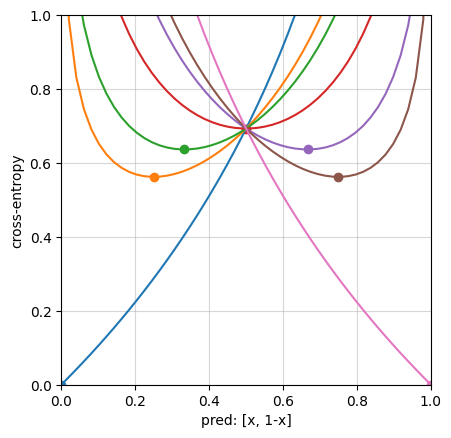

In [ ]:
c=0
for i in targets_list:
  values = []
  for ele in np.linspace(0,1):
      values.append(CE_calculate([i, 1-i], [ele, 1 - ele]))
  plt.plot(np.linspace(0, 1), values, label = 'target = [{t1},{t2}]'.format(t1=round(i,2),t2=round(1-i,2)))

  #min_y = np.min(values)
  #min_x = np.linspace(0, 1)[values.index(min_y)]

  plt.scatter(i, CE_calculate([i, 1-i], [i, 1 - i]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c])
  c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel('cross-entropy')
plt.xlabel('pred: [x, 1-x]')
plt.gca().set_aspect("equal")
# Put a legend to the right of the current axis
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Unfair penalization on perfect match")
plt.show()

Visual representation of the cross entropy values at the variation of the target. X-axes represent the pre- diction value and Y-axes represent the cross entropy value. The dots highlight the cross entropy values when the target is predicted.

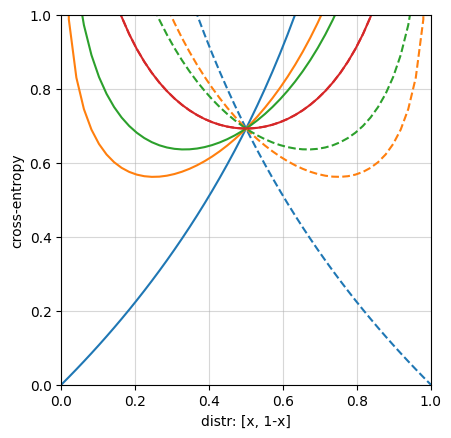

In [ ]:
c=0
for i in targets_list:
  if i <=0.5:
    values = []
    for ele in np.linspace(0,1):
        values.append(CE_calculate([i, 1-i], [ele, 1 - ele]))
    plt.plot(np.linspace(0, 1), values, label = 'target = [{t1},{t2}]'.format(t1=round(i,2),t2=round(1-i,2)), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c])

    values = []
    for ele in np.linspace(0,1):
        values.append(CE_calculate([1-i, i], [ele, 1 - ele]))


    plt.plot(np.linspace(0, 1), values, label = 'target = [{t1},{t2}]'.format(t1=round(1-i,2),t2=round(i,2)), linestyle='dashed', c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c])


    c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel('cross-entropy')
plt.xlabel('distr: [x, 1-x]')
plt.gca().set_aspect("equal")
# Put a legend to the right of the current axis
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Asimmetry")
plt.show()


Visual representation of the cross entropy values at the variation of the target. X-axes represent the prediction value and Y-axes represent the cross entropy value. The dots highlight the cross entropy values when the target is predicted.

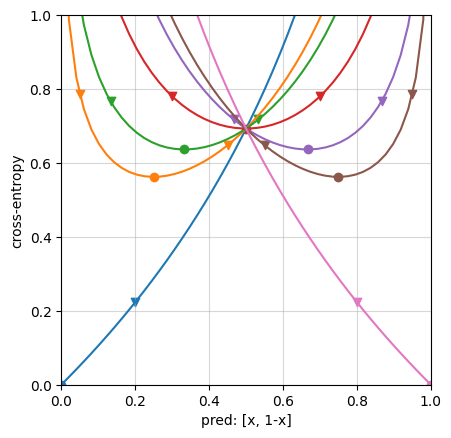

In [ ]:
c=0
for i in targets_list:
  values = []
  for ele in np.linspace(0,1):
      values.append(CE_calculate([i, 1-i], [ele, 1 - ele]))
  plt.plot(np.linspace(0, 1), values, label = 'target = [{t1},{t2}]'.format(t1=round(i,2),t2=round(1-i,2)))

  #min_y = np.min(values)
  #min_x = np.linspace(0, 1)[values.index(min_y)]

  plt.scatter(i, CE_calculate([i, 1-i], [i, 1 - (i)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c] )
  plt.scatter(i-0.2, CE_calculate([i, 1-i], [i-0.2, 1 - (i-0.2)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c], marker='v' )
  plt.scatter(i+0.2, CE_calculate([i, 1-i], [i+0.2, 1 - (i+0.2)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c], marker='v' )
  c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel('cross-entropy')
plt.xlabel('pred: [x, 1-x]')
plt.gca().set_aspect("equal")
# Put a legend to the right of the current axis
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Asimmetry")
plt.show()

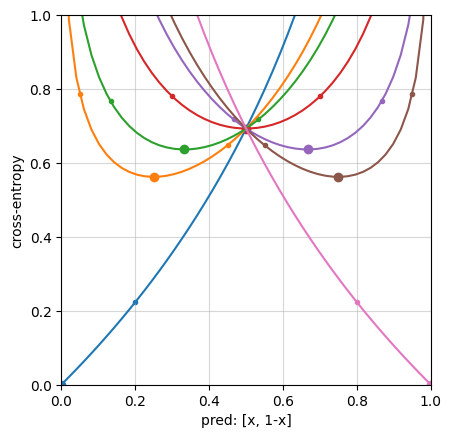

In [ ]:
c=0
for i in targets_list:
  values = []
  for ele in np.linspace(0,1):
      values.append(CE_calculate([i, 1-i], [ele, 1 - ele]))
  plt.plot(np.linspace(0, 1), values, label = 'target = [{t1},{t2}]'.format(t1=round(i,2),t2=round(1-i,2)))

  #min_y = np.min(values)
  #min_x = np.linspace(0, 1)[values.index(min_y)]

  plt.scatter(i, CE_calculate([i, 1-i], [i, 1 - (i)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c] )
  plt.scatter(i-0.2, CE_calculate([i, 1-i], [i-0.2, 1 - (i-0.2)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c], marker='.' )
  plt.scatter(i+0.2, CE_calculate([i, 1-i], [i+0.2, 1 - (i+0.2)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c], marker='.' )
  c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel('cross-entropy')
plt.xlabel('pred: [x, 1-x]')
plt.gca().set_aspect("equal")
# Put a legend to the right of the current axis
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Asimmetry")
plt.show()

Visual representation of the cross entropy values at the variation of the target. X-axes represent the prediction value and Y-axes represent the cross entropy value. The triangles highlight the cross entropy values when the target is predicted. While the dots represents the cross entropy values when  an error of 0.2 is committed in the prediction")

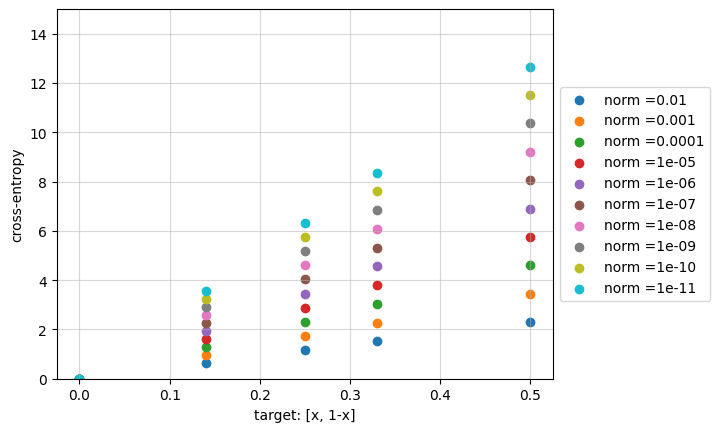

In [ ]:
# target fisso, costante di normalizzazione variabile

for t in [0, 0.14, 0.25, 0.33, 0.5]:
  c=0
  for i in range(2,12):
    values = []
    norm = 1/10**i
    ele=0
    values.append(CE_calculate([t, 1-t], [ele, 1 - ele], norm))
    plt.scatter(t, values, c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c] )
    if t == 0:
      plt.scatter(t, values, label = 'norm ={t}'.format(t=norm), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c])

    c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 15))
plt.ylabel('cross-entropy')
plt.xlabel('target: [x, 1-x]')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Visual representation of the cross entropy values at the variation of the scaling value. X-axes represent the target value and Y-axes represent the cross entropy value. The plot consider a fixed prediction value of 0.

## Manhattan Distance (MD)

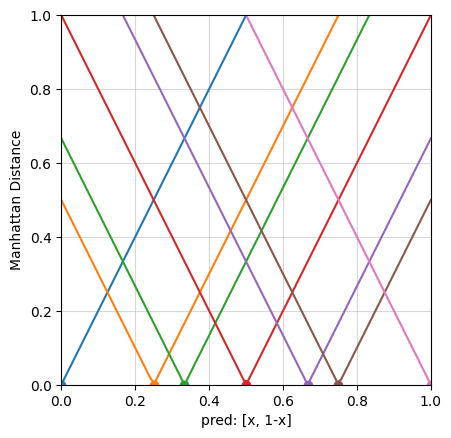

In [ ]:
c=0
for i in targets_list:
  values = []
  for ele in np.linspace(0,1, 100):
      values.append(MD_calculate([i, 1-i], [ele, 1 - ele]))
  plt.plot(np.linspace(0, 1, 100), values, label = 'target = [{t1},{t2}]'.format(t1=round(i,2),t2=round(1-i,2)))


  plt.scatter(i, MD_calculate([i, 1-i], [i, 1 - i]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c] )
  c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel('Manhattan Distance')
plt.xlabel('pred: [x, 1-x]')
plt.gca().set_aspect("equal")

plt.show()

Visual representation of the cross entropy values at the variation of the target. X-axes represent the prediction value and Y-axes represent the Manhattan Distance value. The dots highlight the cross entropy values when the target is predicted.

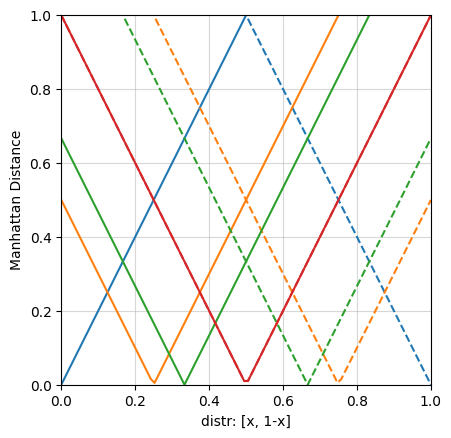

In [ ]:
c=0
for i in targets_list:
  if i <=0.5:
    values = []
    for ele in np.linspace(0,1,100):
        values.append(MD_calculate([i, 1-i], [ele, 1 - ele]))
    plt.plot(np.linspace(0, 1,100), values, label = 'target = [{t1},{t2}]'.format(t1=round(i,2),t2=round(1-i,2)), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c])

    values = []
    for ele in np.linspace(0,1,100):
        values.append(MD_calculate([1-i, i], [ele, 1 - ele]))


    plt.plot(np.linspace(0, 1,100), values, label = 'target = [{t1},{t2}]'.format(t1=round(1-i,2),t2=round(i,2)), linestyle='dashed', c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c])


    c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel('Manhattan Distance')
plt.xlabel('distr: [x, 1-x]')
plt.gca().set_aspect("equal")
# Put a legend to the right of the current axis
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Asimmetry")
plt.show()


Visual representation of the cross entropy values at the variation of the target. X-axes represent the prediction value and Y-axes represent the Manhattan Distance value. The dots highlight the cross entropy values when the target is predicted.

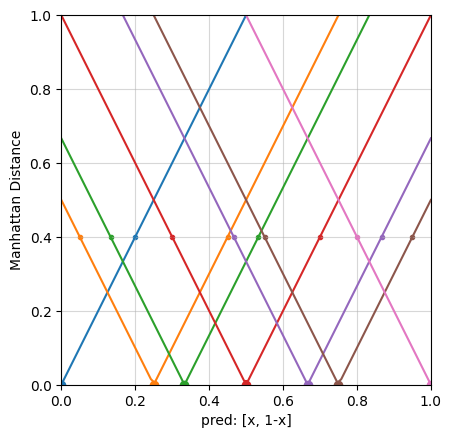

In [ ]:
c=0
for i in targets_list:
  values = []
  for ele in np.linspace(0,1, 100):
      values.append(MD_calculate([i, 1-i], [ele, 1 - ele]))
  plt.plot(np.linspace(0, 1, 100), values, label = 'target = [{t1},{t2}]'.format(t1=round(i,2),t2=round(1-i,2)))

  #min_y = np.min(values)
  #min_x = np.linspace(0, 1)[values.index(min_y)]

  plt.scatter(i, MD_calculate([i, 1-i], [i, 1 - (i)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c] )
  plt.scatter(i-0.2, MD_calculate([i, 1-i], [i-0.2, 1 - (i-0.2)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c], marker='.' )
  plt.scatter(i+0.2, MD_calculate([i, 1-i], [i+0.2, 1 - (i+0.2)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c], marker='.' )
  c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel('Manhattan Distance')
plt.xlabel('pred: [x, 1-x]')
# Put a legend to the right of the current axis
plt.gca().set_aspect("equal")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Simmetry")
plt.show()

Visual representation of the Manhattan Distance values at the variation of the target. X-axes represent the prediction value and Y-axes represent the cross entropy value. The triangles highlight the Manhattan Distance values when the target is predicted. While the dots represents the Manhattan Distance values when  an error of 0.2 is committed in the prediction

## Euclidean Distance (MD)

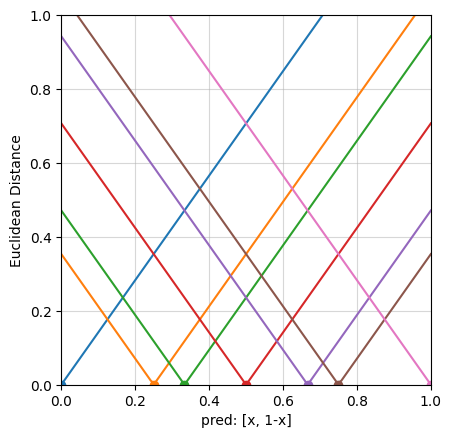

In [ ]:
c=0
for i in targets_list:
  values = []
  for ele in np.linspace(0,1, 100):
      values.append(EU_calculate([i, 1-i], [ele, 1 - ele]))
  plt.plot(np.linspace(0, 1, 100), values, label = 'target = [{t1},{t2}]'.format(t1=round(i,2),t2=round(1-i,2)))

  #min_y = np.min(values)
  #min_x = np.linspace(0, 1)[values.index(min_y)]

  plt.scatter(i, EU_calculate([i, 1-i], [i, 1 - i]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c] )
  c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel('Euclidean Distance')
plt.xlabel('pred: [x, 1-x]')
plt.gca().set_aspect("equal")
# Put a legend to the right of the current axis
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Fair penalization on perfect match")
plt.show()

Visual representation of the cross entropy values at the variation of the target. X-axes represent the prediction value and Y-axes represent the Manhattan Distance value. The dots highlight the cross entropy values when the target is predicted.

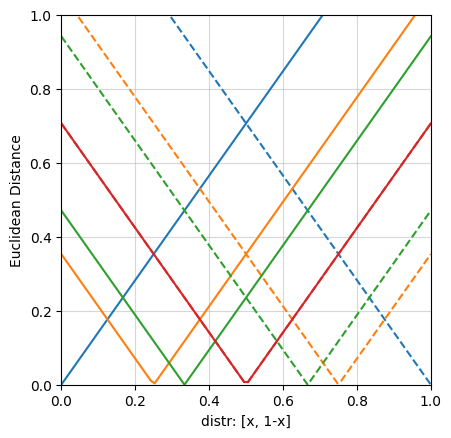

In [ ]:
c=0
for i in targets_list:
  if i <=0.5:
    values = []
    for ele in np.linspace(0,1,100):
        values.append(EU_calculate([i, 1-i], [ele, 1 - ele]))
    plt.plot(np.linspace(0, 1,100), values, label = 'target = [{t1},{t2}]'.format(t1=round(i,2),t2=round(1-i,2)), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c])

    values = []
    for ele in np.linspace(0,1,100):
        values.append(EU_calculate([1-i, i], [ele, 1 - ele]))


    plt.plot(np.linspace(0, 1,100), values, label = 'target = [{t1},{t2}]'.format(t1=round(1-i,2),t2=round(i,2)), linestyle='dashed', c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c])


    c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel('Euclidean Distance')
plt.xlabel('distr: [x, 1-x]')
plt.gca().set_aspect("equal")
# Put a legend to the right of the current axis
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Asimmetry")
plt.show()


Visual representation of the cross entropy values at the variation of the target. X-axes represent the prediction value and Y-axes represent the Manhattan Distance value. The dots highlight the cross entropy values when the target is predicted.

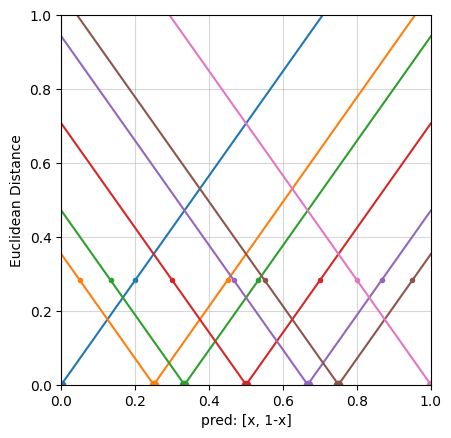

In [ ]:
c=0
for i in targets_list:
  values = []
  for ele in np.linspace(0,1, 100):
      values.append(EU_calculate([i, 1-i], [ele, 1 - ele]))
  plt.plot(np.linspace(0, 1, 100), values, label = 'target = [{t1},{t2}]'.format(t1=round(i,2),t2=round(1-i,2)))

  #min_y = np.min(values)
  #min_x = np.linspace(0, 1)[values.index(min_y)]

  plt.scatter(i, EU_calculate([i, 1-i], [i, 1 - (i)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c] )
  plt.scatter(i-0.2, EU_calculate([i, 1-i], [i-0.2, 1 - (i-0.2)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c], marker='.' )
  plt.scatter(i+0.2, EU_calculate([i, 1-i], [i+0.2, 1 - (i+0.2)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c], marker='.' )
  c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel('Euclidean Distance')
plt.xlabel('pred: [x, 1-x]')
# Put a legend to the right of the current axis
plt.gca().set_aspect("equal")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Simmetry")
plt.show()

Visual representation of the Manhattan Distance values at the variation of the target. X-axes represent the prediction value and Y-axes represent the cross entropy value. The triangles highlight the Manhattan Distance values when the target is predicted. While the dots represents the Manhattan Distance values when  an error of 0.2 is committed in the prediction

## Jansen-Shannon Divergence

<ipython-input-7-d1b72718e939>:10: RuntimeWarning: invalid value encountered in sqrt
  return round(np.sqrt(result),5)


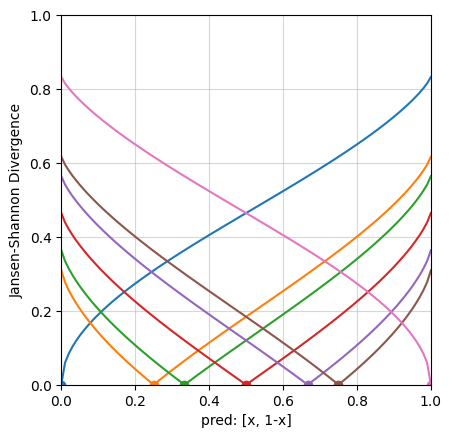

In [ ]:
c=0
for i in targets_list:
  values = []
  for ele in np.linspace(0,1,100):
      values.append(JS_calculate([i, 1-i], [ele, 1 - ele]))
  plt.plot(np.linspace(0, 1,100), values, label = 'target = [{t1},{t2}]'.format(t1=round(i,2),t2=round(1-i,2)))

  #min_y = np.min(values)
  #min_x = np.linspace(0, 1)[values.index(min_y)]

  plt.scatter(i, JS_calculate([i, 1-i], [i, 1 - i]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c] )
  c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel('Jansen-Shannon Divergence')
plt.xlabel('pred: [x, 1-x]')
# Put a legend to the right of the current axis
plt.gca().set_aspect("equal")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Fair penalization on perfect match")
plt.show()

Visual representation of the Jansen-Shannon Divergence values at the variation of the target. X-axes represent the pre- diction value and Y-axes represent the Jansen-Shannon Divergence value. The dots highlight the Jansen-Shannon Divergence values when the target is predicted.

<ipython-input-7-d1b72718e939>:10: RuntimeWarning: invalid value encountered in sqrt
  return round(np.sqrt(result),5)


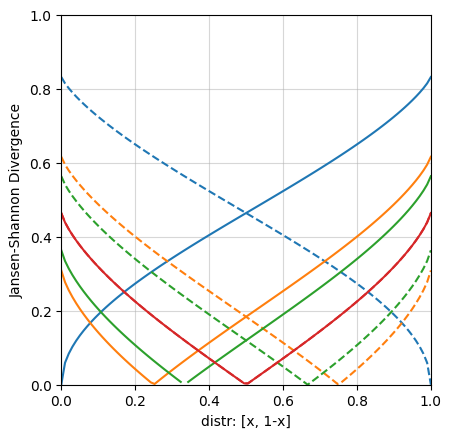

In [ ]:
c=0
for i in targets_list:
  if i <=0.5:
    values = []
    for ele in np.linspace(0,1, 100):
        values.append(JS_calculate([i, 1-i], [ele, 1 - ele]))
    plt.plot(np.linspace(0, 1,100), values, label = 'target = [{t1},{t2}]'.format(t1=round(i,2),t2=round(1-i,2)), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c])

    values = []
    for ele in np.linspace(0,1, 100):
        values.append(JS_calculate([1-i, i], [ele, 1 - ele]))


    plt.plot(np.linspace(0, 1,100), values, label = 'target = [{t1},{t2}]'.format(t1=round(1-i,2),t2=round(i,2)), linestyle='dashed', c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c])


    c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel('Jansen-Shannon Divergence')
plt.xlabel('distr: [x, 1-x]')
plt.gca().set_aspect("equal")
# Put a legend to the right of the current axis
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Asimmetry")
plt.show()


Visual representation of the Jansen-Shannon Divergence values at the variation of the target. X-axes represent the prediction value and Y-axes represent the Jansen-Shannon Divergence value. The dots highlight the Jansen-Shannon Divergence values when the target is predicted.

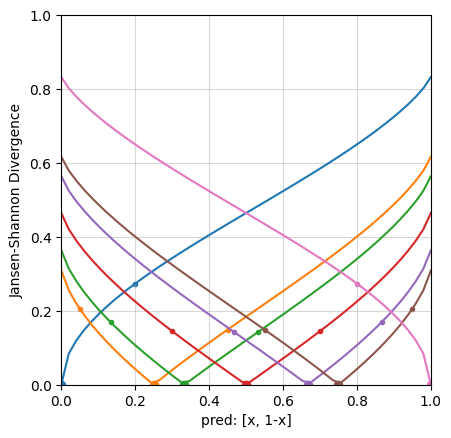

In [ ]:
c=0
for i in targets_list:
  values = []
  for ele in np.linspace(0,1):
      values.append(JS_calculate([i, 1-i], [ele, 1 - ele]))
  plt.plot(np.linspace(0, 1), values, label = 'target = [{t1},{t2}]'.format(t1=round(i,2),t2=round(1-i,2)))

  #min_y = np.min(values)
  #min_x = np.linspace(0, 1)[values.index(min_y)]

  plt.scatter(i, JS_calculate([i, 1-i], [i, 1 - (i)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c])
  plt.scatter(i-0.2, JS_calculate([i, 1-i], [i-0.2, 1 - (i-0.2)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c] , marker='.' )
  plt.scatter(i+0.2, JS_calculate([i, 1-i], [i+0.2, 1 - (i+0.2)]), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c], marker='.'  )
  c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel('Jansen-Shannon Divergence')
plt.xlabel('pred: [x, 1-x]')
plt.gca().set_aspect("equal")
# Put a legend to the right of the current axis
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("Asimmetry")
plt.show()

Visual representation of the Jensen-Shannon Divergence values at the variation of the target. X-axes represent the prediction value and Y-axes represent the Jensen-Shannon Divergence value. The triangles highlight the Jensen-Shannon Divergencevalues when the target is predicted. While the dots represents the Jensen-Shannon Divergence values when  an error of 0.2 is committed in the prediction

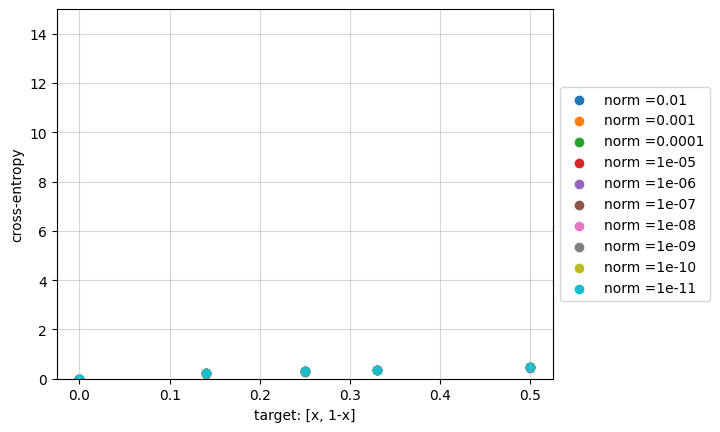

In [ ]:
# target fisso, costante di normalizzazione variabile

for t in [0, 0.14, 0.25, 0.33, 0.5]:
  c=0
  for i in range(2,12):
    values = []
    norm = 1/10**i
    ele=0
    values.append(JS_calculate([t, 1-t], [ele, 1 - ele], norm))
    plt.scatter(t, values, c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c] )
    if t == 0:
      plt.scatter(t, values, label = 'norm ={t}'.format(t=norm), c=plt.rcParams['axes.prop_cycle'].by_key()['color'][c])

    c=c+1
plt.grid(alpha = .5)
plt.ylim((0, 15))
plt.ylabel('cross-entropy')
plt.xlabel('target: [x, 1-x]')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Visual representation of the Jensen-Shannon Divergence values at the variation of the scaling value. X-axes represent the target value and Y-axes represent the Jensen-Shannon Divergence value. The plot consider a fixed prediction value of 0.

# Properties

## Symmetry
Given two probability distributions ${\textit{q}(k)}$ and
${\textit{p}(k)}$ representing the probability of an item $k$ being classified with the positive label and the corresponding real value associated with $k$ in the golden standard,
$ \mathbb{M}(\textit{p(k),q(k)})= \mathbb{M}(\textit{q(k),p(k)}) $

In [10]:
T1  =[0.5, 0.5]
M1= [0.83, 0.17]
T2 = [0.83, 0.17]
M2 = [0.5, 0.5]

print('T1: ' + str(T1) + ' M1: ' +str(M1))
print('T2: ' + str(T2) + ' M2: ' +str(M2))

print('MD\tT1-M1:\t'+str(MD_calculate(T1,M1))+'\tT2-M2:\t'+str(MD_calculate(T2,M2)))
print('CE\tT1-M1:\t'+str(CE_calculate(T1,M1))+'\tT2-M2:\t'+str(CE_calculate(T2,M2)))
print('EU\tT1=M1:\t'+str(EU_calculate(T1,M1))+'\tT2-M2:\t'+str(EU_calculate(T2,M2)))
print('JS\tT1-M1:\t'+str(JS_calculate(T1,M1))+'\tT2-M2:\t'+str(JS_calculate(T2,M2)))

T1: [0.5, 0.5] M1: [0.83, 0.17]
T2: [0.83, 0.17] M2: [0.5, 0.5]
MD	T1-M1:	0.66	T2-M2:	0.66
CE	T1-M1:	0.97914	T2-M2:	0.69315
EU	T1=M1:	0.46669	T2-M2:	0.46669
JS	T1-M1:	0.25129	T2-M2:	0.25129


## Triangle Inequality
Given three probability distributions ${\textit{q}(k)}$, ${\textit{r}(k)}$, and
${\textit{p}(k)}$ representing the probability of an item $k$ being classified with the positive label by two different models (${\textit{q}(k)}$ and ${\textit{r}(k)}$) and the corresponding real value associated with $k$ in the golden standard (${\textit{p}(k)}$),

$ \mathbb{M}(\textit{p(k),q(k)}) +
 \mathbb{M}(\textit{q(k),r(k)}) \geq \mathbb{M}(\textit{p(k),r(k)})$

In [15]:
M1  =[0.95, 0.05]
M2= [1, 0]
T1 = [0.7, 0.3]

print('MD\tT1-M1:\t'+str(MD_calculate(T1,M1))+'\tM1-M2:\t'+str(MD_calculate(M1,M2)))
print('MD\tT1-M1 + M1-M2:\t'+str(MD_calculate(T1,M1)+MD_calculate(M1,M2)) +'\tT1-M2:\t'+str(MD_calculate(T1,M2)))

print('CE\tT1-M1:\t'+str(CE_calculate(T1,M1))+'\tM1-M2:\t'+str(CE_calculate(M1,M2)))
print('CE\tT1-M1 + M1-M2:\t'+str(CE_calculate(T1,M1)+CE_calculate(M1,M2)) +'\tT1-M2:\t'+str(CE_calculate(T1,M2)))

print('EU\tT1-M1:\t'+str(EU_calculate(T1,M1))+'\tM1-M2:\t'+str(EU_calculate(M1,M2)))
print('EU\tT1-M1 + M1-M2:\t'+str(EU_calculate(T1,M1)+EU_calculate(M1,M2)) +'\tT1-M2:\t'+str(EU_calculate(T1,M2)))

print('JS\tT1-M1:\t'+str(JS_calculate(T1,M1))+'\tM1-M2:\t'+str(JS_calculate(M1,M2)))
print('JS\tT1-M1 + M1-M2:\t'+str(JS_calculate(T1,M1)+JS_calculate(M1,M2)) +'\tT1-M2:\t'+str(JS_calculate(T1,M2)))

MD	T1-M1:	0.5	M1-M2:	0.1
MD	T1-M1 + M1-M2:	0.6	T1-M2:	0.6
CE	T1-M1:	0.93462	M1-M2:	1.38155
CE	T1-M1 + M1-M2:	2.31617	T1-M2:	8.28931
EU	T1-M1:	0.35355	M1-M2:	0.07071
EU	T1-M1 + M1-M2:	0.42425999999999997	T1-M2:	0.42426
JS	T1-M1:	0.24297	M1-M2:	0.13285
JS	T1-M1 + M1-M2:	0.37582	T1-M2:	0.34246


## Transitivity
Given three probability distributions ${\textit{q}(k)}$, ${\textit{r}(k)}$, and
${\textit{p}(k)}$ representing the probability of an item $k$ being classified with the positive label by two different models (${\textit{q}(k)}$ and ${\textit{r}(k)}$) and the corresponding real value associated with $k$ in the golden standard (${\textit{p}(k)}$),

\begin{equation}
    \mathbb{M}(\textit{p(k),q(k)}) <
 \mathbb{M}(\textit{p(k),r(k)})
 \Rightarrow \mathbb{M}(\textit{q(k),r(k)}) < \mathbb{M}(\textit{p(k),r(k)})
\end{equation}  

In [ ]:
T1 = [1.0, 0.0]
M1 = [0.9, 0.1]
M2 = [0.0, 1.0]

alpha = 0.5


print('SE MD\tT1-M1:\t'+str(MD_calculate(T1,M1))+'< \tM1-M2:\t'+str(MD_calculate(T1,M2)))
print('allora MD\tT1-M1:\t'+str(MD_calculate(M1,M2))+'< \tM1-M2:\t'+str(MD_calculate(T1,M2)))

print('SE CE\tT1-M1:\t'+str(CE_calculate(T1,M1))+'< \tM1-M2:\t'+str(CE_calculate(T1,M2)))
print('allora CE\tT1-M1:\t'+str(CE_calculate(M1,M2))+'< \tM1-M2:\t'+str(CE_calculate(T1,M2)))

print('SE EU\tT1-M1:\t'+str(EU_calculate(T1,M1))+'< \tM1-M2:\t'+str(EU_calculate(T1,M2)))
print('allora EU\tT1-M1:\t'+str(EU_calculate(M1,M2))+'< \tM1-M2:\t'+str(EU_calculate(T1,M2)))

print('SE WS\tT1-M1:\t'+str(WS_calculate(T1,M1))+'< \tM1-M2:\t'+str(WS_calculate(T1,M2)))
print('allora WS\tT1-M1:\t'+str(WS_calculate(M1,M2))+'< \tM1-M2:\t'+str(WS_calculate(T1,M2)))

print('SE JS\tT1-M1:\t'+str(JS_calculate(T1,M1))+'< \tM1-M2:\t'+str(JS_calculate(T1,M2)))
print('allora JS\tT1-M1:\t'+str(JS_calculate(M1,M2))+'< \tM1-M2:\t'+str(JS_calculate(T1,M2)))


SE MD	T1-M1:	0.2< 	M1-M2:	2.0
allora MD	T1-M1:	1.8< 	M1-M2:	2.0
SE CE	T1-M1:	0.10536< 	M1-M2:	27.63102
allora CE	T1-M1:	24.86792< 	M1-M2:	27.63102
SE EU	T1-M1:	0.14142< 	M1-M2:	1.41421
allora EU	T1-M1:	1.27279< 	M1-M2:	1.41421
SE WS	T1-M1:	0.1< 	M1-M2:	1.0
allora WS	T1-M1:	0.9< 	M1-M2:	1.0
SE JS	T1-M1:	0.18967< 	M1-M2:	0.83255
allora JS	T1-M1:	0.72498< 	M1-M2:	0.83255


## Sum invariant
 \textit{Given two probability distributions ${\textit{q}(k)}$, and
${\textit{p}(k)}$ representing the probability of an item $k$ being classified with the positive label by a model (${\textit{q}(k)}$) and the corresponding real value associated with $k$ in the golden standard (${\textit{p}(k)}$). A divergence $\mathbb{M}$ is sum invariant if whenever $c$ is independent from $p, q$}
$ \mathbb{M}(c + p(k), c + q(k) ) <= \mathbb{M}(p(k), q(k)) $

In [16]:
#Fair penalization
T1  =[0.9, 0.1]
M1= [1, 0]
T2 = T1
M2 = [0.7, 0.3]

alpha = 0.5

print('T1: ' + str(T1) + ' M1: ' +str(M1))
print('T2: ' + str(T2) + ' M2: ' +str(M2))

print('MD\tT1-M1:\t'+str(MD_calculate(T1,M1))+'\tT2-M2:\t'+str(MD_calculate(T2,M2)))
print('CE\tT1-M1:\t'+str(CE_calculate(T1,M1))+'\tT2-M2:\t'+str(CE_calculate(T2,M2)))
print('EU\tT1=M1:\t'+str(EU_calculate(T1,M1))+'\tT2-M2:\t'+str(EU_calculate(T2,M2)))
print('JS\tT1-M1:\t'+str(JS_calculate(T1,M1))+'\tT2-M2:\t'+str(JS_calculate(T2,M2)))


T1: [0.9, 0.1] M1: [1, 0]
T2: [0.9, 0.1] M2: [0.7, 0.3]
MD	T1-M1:	0.2	T2-M2:	0.4
CE	T1-M1:	2.7631	T2-M2:	0.4414
EU	T1=M1:	0.14142	T2-M2:	0.28284
JS	T1-M1:	0.18967	T2-M2:	0.18008


In [17]:
# Unfair penalization of perfect match

T1  =[0.5, 0.5]
M1= [0.5, 0.5]
T2 = [0.9, 0.1]
M2 = [0.9, 0.1]

alpha = 0.5
print('T1: ' + str(T1) + ' M1: ' +str(M1))
print('T2: ' + str(T2) + ' M2: ' +str(M2))

print('MD\tT1-M1:\t'+str(MD_calculate(T1,M1))+'\tT2-M2:\t'+str(MD_calculate(T2,M2)))
print('CE\tT1-M1:\t'+str(CE_calculate(T1,M1))+'\tT2-M2:\t'+str(CE_calculate(T2,M2)))
print('EU\tT1=M1:\t'+str(EU_calculate(T1,M1))+'\tT2-M2:\t'+str(EU_calculate(T2,M2)))
print('JS\tT1-M1:\t'+str(JS_calculate(T1,M1))+'\tT2-M2:\t'+str(JS_calculate(T2,M2)))

T1: [0.5, 0.5] M1: [0.5, 0.5]
T2: [0.9, 0.1] M2: [0.9, 0.1]
MD	T1-M1:	0.0	T2-M2:	0.0
CE	T1-M1:	0.69315	T2-M2:	0.32508
EU	T1=M1:	0.0	T2-M2:	0.0
JS	T1-M1:	0.0	T2-M2:	0.0


# Multi-class properties

## Non-Invariance with respect to the Most Probable Label

Given three probability distributions ${\textit{q}(k)}$, ${\textit{r}(k)}$, and
${\textit{p}(k)}$ representing the probability of an item $k$ being classified with the positive label by two different models (${\textit{q}(k)}$ and ${\textit{r}(k)}$) and the corresponding real value associated with $k$ in the golden standard (${\textit{p}(k)}$), let $\mathbb{M}($p$, \textit{q})$ and  $\mathbb{M}(\textit{p}, \textit{r})$ denote the distance measure between the two probability distributions and the golden standard if the most probable label in $q$ corresponds to the target distribution  $p$, and the most probable label in $r$ does not correspond to the target distribution  $p$, then $\mathbb{M}(\textit{p}(k), \textit{q}(k)) < \mathbb{M}(\textit{p}(k), (\textit{r}(k)))$

In [18]:
T1  =[0, 0.1, 0.1, 0.8]
M1= [0.1, 0.3, 0.2, 0.4]
T2 = T1
M2 = [0.0, 0.1, 0.5, 0.4]

alpha = 0.5

print('T1: ' + str(T1) + ' M1: ' +str(M1))
print('T2: ' + str(T2) + ' M2: ' +str(M2))
print()

print('MD\tT1-M1:\t'+str(MD_calculate(T1,M1))+'\tT2-M2:\t'+str(MD_calculate(T2,M2)))
print('CE\tT1-M1:\t'+str(CE_calculate(T1,M1))+'\tT2-M2:\t'+str(CE_calculate(T2,M2)))
print('EU\tT1=M1:\t'+str(EU_calculate(T1,M1))+'\tT2-M2:\t'+str(EU_calculate(T2,M2)))
print('JS\tT1-M1:\t'+str(JS_calculate(T1,M1))+'\tT2-M2:\t'+str(JS_calculate(T2,M2)))

T1: [0, 0.1, 0.1, 0.8] M1: [0.1, 0.3, 0.2, 0.4]
T2: [0, 0.1, 0.1, 0.8] M2: [0.0, 0.1, 0.5, 0.4]

MD	T1-M1:	0.8	T2-M2:	0.8
CE	T1-M1:	1.01437	T2-M2:	1.03261
EU	T1=M1:	0.46904	T2-M2:	0.56569
JS	T1-M1:	0.32139	T2-M2:	0.32673


## Positional Error Sensitivity for Multiple Labels

Given three probability distributions ${\textit{q}(k)}$, ${\textit{r}(k)}$ and
${\textit{p}(k)}$ representing the probability of an item $k$ being classified with the positive label by two different models (${\textit{q}(k)}$ and ${\textit{r}(k)}$) and the corresponding real value associated with $k$ in the golden standard (${\textit{p}(k)}$),
if $\sum_{i}|\textit{p}_i(k) - \textit{q}_i(k)| \leq \sum_{i}|\textit{p}_i(k) - \textit{r}_i(k)| $, then $\mathbb{M}(\textit{p}(k), \textit{q}(k)) \leq \mathbb{M}(\textit{p}(k), (\textit{r}(k)))$.

In [19]:
# Example 3: Large errors are equal to small distribute errors

T1  =[ 0, 0, 0, 0, 0, 1]
T2 = T1
M1= [0, 0, 0, 0, 0.2, 0.8]
M2= [ 0, 0.05, 0.05, 0.05, 0.05, 0.8]

alpha = 0.5
print('T1: ' + str(T1) + ' M1: ' +str(M1))
print('T2: ' + str(T2) + ' M2: ' +str(M2))
print()

print('MD\tT1-M1:\t'+str(MD_calculate(T1,M1))+'\tT2-M2:\t'+str(MD_calculate(T2,M2)))
print('CE\tT1-M1:\t'+str(CE_calculate(T1,M1))+'\tT2-M2:\t'+str(CE_calculate(T2,M2)))
print('EU\tT1=M1:\t'+str(EU_calculate(T1,M1))+'\tT2-M2:\t'+str(EU_calculate(T2,M2)))
print('JS\tT1-M1:\t'+str(JS_calculate(T1,M1))+'\tT2-M2:\t'+str(JS_calculate(T2,M2)))

T1: [0, 0, 0, 0, 0, 1] M1: [0, 0, 0, 0, 0.2, 0.8]
T2: [0, 0, 0, 0, 0, 1] M2: [0, 0.05, 0.05, 0.05, 0.05, 0.8]

MD	T1-M1:	0.4	T2-M2:	0.4
CE	T1-M1:	0.22314	T2-M2:	0.22314
EU	T1=M1:	0.28284	T2-M2:	0.22361
JS	T1-M1:	0.27365	T2-M2:	0.27365


In [20]:
T1  =[ 0, 0, 0, 0, 0.3, 0.7]
T2 = T1
M1= [0.25, 0.25, 0.25, 0.25, 0, 0]
M2= [ 0, 0, 0, 0, 1, 0]

alpha = 0.5
print('T1: ' + str(T1) + ' M1: ' +str(M1))
print('T2: ' + str(T2) + ' M2: ' +str(M2))
print()

print('MD\tT1-M1:\t'+str(MD_calculate(T1,M1))+'\tT2-M2:\t'+str(MD_calculate(T2,M2)))
print('CE\tT1-M1:\t'+str(CE_calculate(T1,M1))+'\tT2-M2:\t'+str(CE_calculate(T2,M2)))
print('EU\tT1=M1:\t'+str(EU_calculate(T1,M1))+'\tT2-M2:\t'+str(EU_calculate(T2,M2)))
print('JS\tT1-M1:\t'+str(JS_calculate(T1,M1))+'\tT2-M2:\t'+str(JS_calculate(T2,M2)))

T1: [0, 0, 0, 0, 0.3, 0.7] M1: [0.25, 0.25, 0.25, 0.25, 0, 0]
T2: [0, 0, 0, 0, 0.3, 0.7] M2: [0, 0, 0, 0, 1, 0]

MD	T1-M1:	2.0	T2-M2:	1.4
CE	T1-M1:	27.63102	T2-M2:	19.34171
EU	T1=M1:	0.91104	T2-M2:	0.98995
JS	T1-M1:	0.83255	T2-M2:	0.58482
